Processing content image: absolut-0NNhN0jggvo-unsplash.jpg, style image: f2180e9764b5eaf479157919944bec290f1c2c76-5121x1707.jpg
Processing content image: andrea-de-santis-Xr5aCdNHzBg-unsplash.jpg, style image: f2180e9764b5eaf479157919944bec290f1c2c76-5121x1707.jpg
Processing content image: mos-design-ZzxivGdFVSY-unsplash.jpg, style image: f2180e9764b5eaf479157919944bec290f1c2c76-5121x1707.jpg


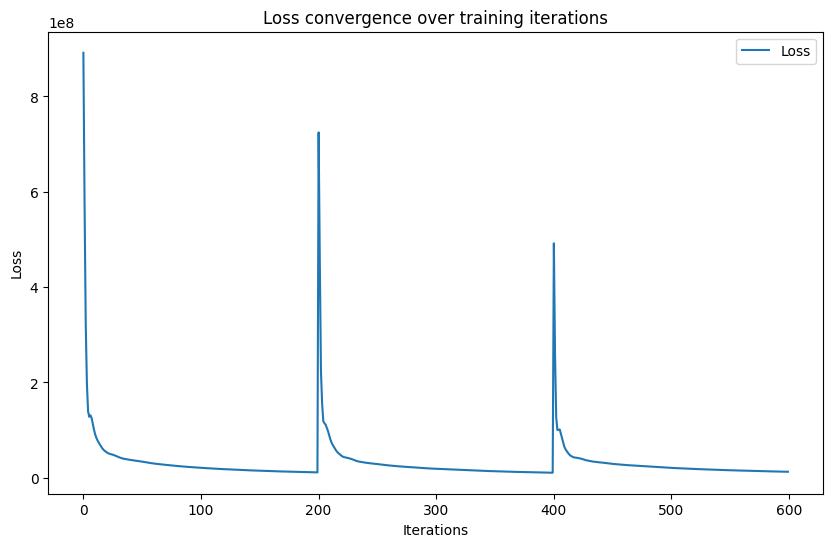

In [1]:
import os
import matplotlib.pyplot as plt

# Ensure that 'nst.py' is in the same directory as this script or the script is aware of the directory
import sys
sys.path.append('.')  # Add the current directory to the Python path

from nst import NeuralStyleTransfer  # Import the NeuralStyleTransfer class

def plot_loss(all_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(all_losses, label='Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss convergence over training iterations')
    plt.legend()
    plt.show()

def compute_losses(content_folder, style_folder, output_folder):
    content_images = os.listdir(content_folder)
    style_images = os.listdir(style_folder)
    nst = NeuralStyleTransfer(content_layers=['block5_conv2'], style_layers=['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])
    all_losses = []

    for content_img in content_images:
        content_path = os.path.join(content_folder, content_img)
        for style_img in style_images:
            style_path = os.path.join(style_folder, style_img)
            print(f"Processing content image: {content_img}, style image: {style_img}")
            output_path = os.path.join(output_folder, f"{content_img.split('.')[0]}_{style_img.split('.')[0]}.png")
            losses = nst.run(content_path, style_path, output_path, epochs=2, steps_per_epoch=100)
            all_losses.extend(losses)

    return all_losses

if __name__ == "__main__":
    content_folder = 'Images'  # Replace with the path to your content images folder
    style_folder = 'Style'     # Replace with the path to your style images folder
    output_folder = 'Output'   # Replace with the path to your output images folder

    all_losses = compute_losses(content_folder, style_folder, output_folder)
    plot_loss(all_losses)
